In [20]:
student_number = '400104867'
Name = 'Payam'
Last_Name = 'Taebi'

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [22]:
#ebteda be ravesh jabri javab daqiq ra be dast miavarim ke dar bakhsh badi betavanim ba javab takhmin zade shode baresi konim

In [23]:
number_of_states=int(input())
entries = list(map(float, input().split()))
p_vector_backup = np.array(entries)
p_vectors = [np.array(entries)]

entries = list(map(float, input().split()))
P_matrix = np.matrix(entries).reshape(number_of_states, number_of_states)
P_matrix_backup = np.matrix(entries).reshape(number_of_states, number_of_states)

print("initial states prob :\n",p_vectors)
print("Transition matrix :\n",P_matrix)

3
0.3 0.2 0.5
0.9 0.1 0 0.15 0.25 0.6 0.3 0.3 0.4
initial states prob :
 [array([0.3, 0.2, 0.5])]
Transition matrix :
 [[0.9  0.1  0.  ]
 [0.15 0.25 0.6 ]
 [0.3  0.3  0.4 ]]


In [24]:
"""
in function miad 2 ta P_i posht ham ro barresi mikone age taghirat hame kamtar az thresold bashe mige ke javab nahaei shode
"""
def is_converge(p_vectors, threshold):
    a = p_vectors[-1]
    b = p_vectors[-2]
    tmp = np.subtract(a, b)
    for i in tmp:
        if abs(i) > threshold:
            return False
    return True


def return_next_step(first, transition):
    return np.dot(first, transition)


def go_next_step(first, transition):
    tmp = return_next_step(first[-1], transition)
    tmp = tmp.tolist()
    tmp = tmp[0]
    first.append(tmp)

"""
in tabe ke bakhsh asli ast unghadr p*P^n ra hesab mikonad ta jaei ke converge konad va javab ra elam mikonad
"""
def run_until_converge(p_vectors, P_matrix, threshold):
    go_next_step(p_vectors, P_matrix)
    while not is_converge(p_vectors, threshold):
        go_next_step(p_vectors, P_matrix)

In [25]:
run_until_converge(p_vectors, P_matrix, 0.001)
print(p_vectors[-1])

[0.6910848037254528, 0.15419894086895897, 0.15471625540558853]


In [26]:
#b

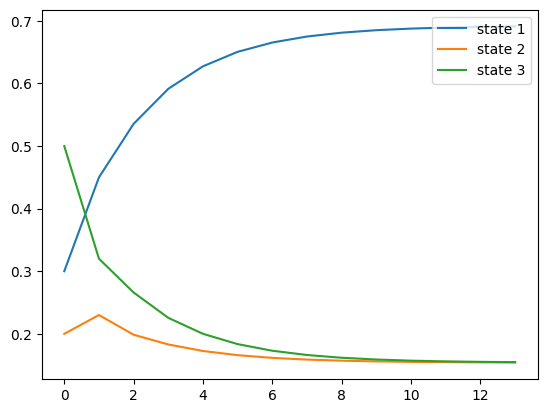

final result is : 
state 1 Probability is : 0.6910848037254528
state 2 Probability is : 0.15419894086895897
state 3 Probability is : 0.15471625540558853


In [27]:
for i in range(number_of_states):
    arr = []
    for j in p_vectors:
        arr.append(j[i])
    plt.plot(arr,label = "state "+str(i+1) )
plt.legend(loc = "upper right")
plt.show()


print("final result is : ")
state_cnt = 1
for i in p_vectors[-1]:
    print("state",state_cnt,"Probability is :",i)
    state_cnt+=1

In [28]:
# hala vaqean ba shabih sazi javab ha ra be dast miavarim:

In [29]:
p_vectors = p_vector_backup
P_matrix = P_matrix_backup

print("initial states prob :\n",p_vectors)
print("Transition matrix :\n",P_matrix)

initial states prob :
 [0.3 0.2 0.5]
Transition matrix :
 [[0.9  0.1  0.  ]
 [0.15 0.25 0.6 ]
 [0.3  0.3  0.4 ]]


In [30]:
"""
dar in Function har bar be shekl random ba ehtemali ke az Transition matrix darim
be state badi miravim va in kar ra steps bar anjam midahim
dar nahayat yek arraye return mikonim ke masir state haei ke toosh boodim ro neshoon mide
"""
def run_simulate_one_time(steps,p_vec,transition_mat):
    result = []
    index_list = list(range(0,len(p_vec)))
    current_index = random.choices(index_list,weights=p_vec,k=1)[0]
    result.append(current_index)
    for i in range(steps):
        tmp = transition_mat[current_index,:]
        tmp = tmp.tolist()
        tmp = tmp[0]   
        current_index = random.choices(index_list,weights=tmp,k=1)[0]
        result.append(current_index)
    return result

def make_percent(array,total): 
    arr = []  
    for i in array :
        arr.append(i / total)
    return arr
    
"""
dar in tabe be tedad times run_simulate_one_time ra bedast miavarim va in kar ra times bar anjam midahim 
ta times ta masir dashte bashim
va yek array 2D return mikonim
"""   
def simulate(times,steps,p_vec,transition_mat):
    result = []
    for i in range(times): 
        result.append(run_simulate_one_time(steps,p_vec,transition_mat))    
    return result

"""
inja yek bar ba farz kardan har bar ta omgh step radftan faghat ezafe shodan times ro dar nazar migirim va dar result_static_step
mirizim yek bar ham farz mikonim ke step moteghayer ast va har bar time sample darim va in data ra dar result_static_time mirizim 
va har 2 ra return mikonim 
ehtemal be dast amade dar akharin index har 2 in array ha gharar darad
"""
def simulate_and_return_observation(times,steps,p_vec,transition_mat):
    arr = simulate(times,steps,p_vec,transition_mat) 
    
    index_visited = [0] * len(p_vec)
    result_static_step = []
    for obs in range(times):
        index = arr[obs][steps - 1]
        index_visited[index] += 1
        result_static_step.append(make_percent(index_visited,obs+1))
    
    
    result_static_time = []
    for obs in range(steps):
        
        index_visited = [0] * len(p_vec)
        for j in range(times):           
            index = arr[j][obs]
            index_visited[index] += 1
            
        result_static_time.append(make_percent(index_visited,times))
    
    return result_static_step,result_static_time
    

In [33]:
times_of_simulations = 5000 
simulation_depth = 100

result_static_step,result_static_time = simulate_and_return_observation(times_of_simulations,simulation_depth,p_vectors,P_matrix)
print(result_static_step[-1])

[0.6842, 0.1564, 0.1594]


In [34]:
#b

This diagram shows the importance of the number of times


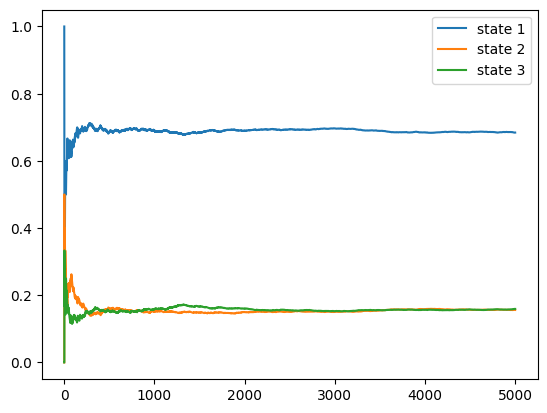

final result is : 
state 1 Probability is : 0.6842
state 2 Probability is : 0.1564
state 3 Probability is : 0.1594


In [35]:
print("This diagram shows the importance of the number of times")
for i in range(number_of_states):
    arr = []
    for j in result_static_step:
        arr.append(j[i])
    plt.plot(arr,label = "state "+str(i+1) )
plt.legend(loc = "upper right")
plt.show()


print("final result is : ")
state_cnt = 1
for i in result_static_step[-1]:
    print("state",state_cnt,"Probability is :",i)
    state_cnt+=1

In [36]:
#mitavan did ke az step 1000 be bad taghriban dar in mesal converge mikonim

This diagram shows the importance of the number of steps


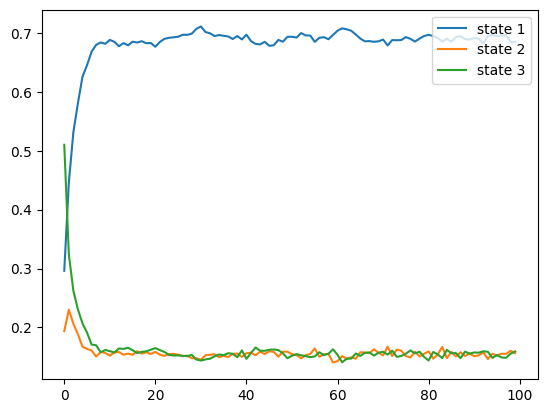

final result is : 
state 1 Probability is : 0.6842
state 2 Probability is : 0.1564
state 3 Probability is : 0.1594


In [37]:
print("This diagram shows the importance of the number of steps")

for i in range(number_of_states):
    arr = []
    for j in result_static_time:
        arr.append(j[i])
    plt.plot(arr,label = "state "+str(i+1) )
plt.legend(loc = "upper right")
plt.show()


print("final result is : ")
state_cnt = 1
for i in result_static_time[-1]:
    print("state",state_cnt,"Probability is :",i)
    state_cnt+=1